# Analysis of Bayesian Optimisation

Analyse the completed study.

## Setup

In [1]:
STUDY_NAME = "study_pls" # the name of the study to analyse

In [2]:
import optuna
import pandas as pd
import matplotlib.pyplot as plt

import study_utils

In [3]:
# load the study
study = optuna.load_study(
    study_name=STUDY_NAME, 
    storage=f"sqlite:///data/{STUDY_NAME}/{STUDY_NAME}.db"
)

## Study Results

Best trial: 563
Best trial value: 0.4454328987459712
Best trial hyperparameters: {'pretreatment': 'pretreatment_2', 'savgol_window_size': 41, 'wavelength_range': 'range_600to990', 'n_components': 40}


C:\Users\12196478\AppData\Local\Temp\ipykernel_8616\721654333.py:5: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

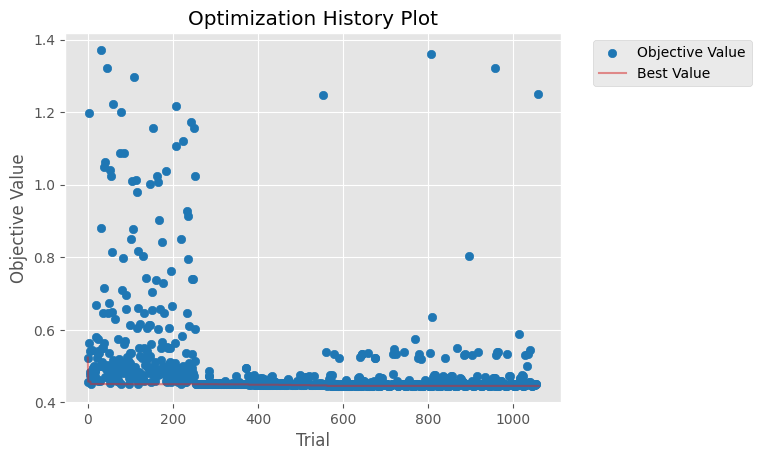

In [4]:
# overview
print("Best trial:", study.best_trial.number)
print("Best trial value:", study.best_trial.value)
print("Best trial hyperparameters:", study.best_trial.params)
optuna.visualization.matplotlib.plot_optimization_history(study)

In [5]:
study_results = study.trials_dataframe().query("number <= 999")
study_results

,number,value,datetime_start,datetime_complete,duration,params_n_components,params_pretreatment,params_savgol_window_size,params_wavelength_range,user_attrs_metric_calibration_mse,user_attrs_metric_calibration_rmse,user_attrs_metric_tuning_mse,user_attrs_metric_tuning_rmse,system_attrs_fixed_params,state
0,0,0.523417,2024-04-04 13:19:31.911349,2024-04-04 13:31:13.172085,0 days 00:11:41.260736,11,pretreatment_2,13.0,range_684to990,1.049603,1.024501,1.005530,1.002761,"{'pretreatment': 'pretreatment_2', 'savgol_win...",COMPLETE
1,1,0.457244,2024-04-04 13:19:31.936918,2024-04-04 13:22:28.820312,0 days 00:02:56.883394,39,pretreatment_1,29.0,range_402to990,0.832753,0.912553,0.828467,0.910202,NaN,COMPLETE
2,2,1.197905,2024-04-04 13:19:31.953453,2024-04-04 13:19:36.173655,0 days 00:00:04.220202,7,pretreatment_0,NaN,range_402to990,4.719345,2.172405,4.427760,2.104224,NaN,COMPLETE
3,3,0.563165,2024-04-04 13:19:31.965580,2024-04-04 13:22:27.274117,0 days 00:02:55.308537,22,pretreatment_3,41.0,range_684to990,1.240767,1.113897,1.218123,1.103686,NaN,COMPLETE
4,4,0.482511,2024-04-04 13:19:31.987469,2024-04-04 13:22:27.821612,0 days 00:02:55.834143,33,pretreatment_1,13.0,range_720to990,0.906096,0.951891,0.878194,0.937120,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.454545,2024-04-05 14:17:41.889359,2024-04-05 14:28:35.310869,0 days 00:10:53.421510,40,pretreatment_2,41.0,range_684to990,0.812476,0.901374,0.795029,0.891644,NaN,COMPLETE
996,996,0.450096,2024-04-05 14:18:02.019973,2024-04-05 14:30:35.405021,0 days 00:12:33.385048,35,pretreatment_2,41.0,range_600to990,0.789265,0.888406,0.761998,0.872925,NaN,COMPLETE
997,997,0.450096,2024-04-05 14:19:54.728956,2024-04-05 14:30:51.272423,0 days 00:10:56.543467,35,pretreatment_2,41.0,range_600to990,0.789265,0.888406,0.761998,0.872925,NaN,COMPLETE
998,998,0.450096,2024-04-05 14:25:52.750241,2024-04-05 14:36:41.869864,0 days 00:10:49.119623,35,pretreatment_2,41.0,range_600to990,0.789265,0.888406,0.761998,0.872925,NaN,COMPLETE


In [6]:
study_results.groupby("params_wavelength_range").size()/1500

params_wavelength_range
range_402to990    0.056000
range_600to990    0.489333
range_684to990    0.063333
range_720to990    0.058000
dtype: float64

In [7]:
study_results.query(f"number == {study.best_trial.number}")

,number,value,datetime_start,datetime_complete,duration,params_n_components,params_pretreatment,params_savgol_window_size,params_wavelength_range,user_attrs_metric_calibration_mse,user_attrs_metric_calibration_rmse,user_attrs_metric_tuning_mse,user_attrs_metric_tuning_rmse,system_attrs_fixed_params,state
563,563,0.445433,2024-04-04 23:08:27.657771,2024-04-04 23:20:41.246772,0 days 00:12:13.589001,40,pretreatment_2,41.0,range_600to990,0.777615,0.881825,0.756546,0.869797,NaN,COMPLETE


## Evaluate particular model

In [8]:
TRIAL_NUMBER = None

In [9]:
# load trial model and predictions
trial_number = TRIAL_NUMBER if TRIAL_NUMBER else study.best_trial.number
model_name = f"trial_{trial_number}"
predictions = pd.read_pickle(f"data/{STUDY_NAME}/models/eval/predict/{model_name}.pkl")
# predictions = predictions.query("subsequent_flag_1 == 0")

In [10]:
train_instruments = (
    predictions.query("partition == 'train'")
    # predictions.query("season in (2015, 2016, 2017, 2018)")
    .groupby(["instrument"])
    .size()
    .reset_index()
)["instrument"].to_list()

In [11]:
test_sets = {
    "training": "partition == 'train'",
    "training_calibration": "partition == 'train' and train_partition == 'calibration'",
    "training_tuning": "partition == 'train' and train_partition == 'tunning'",
    
    # "validation_same_instruments": f"subsequent_flag_1 == 0 and partition == 'validation' and instrument in ({train_instruments})",
    # "validation_diff_instruments": f"subsequent_flag_1 == 0 and partition == 'validation' and instrument not in ({train_instruments})",
    
    "validation": "subsequent_flag_1 == 0 and partition == 'validation'",
    "season 2018": "subsequent_flag_1 == 0 and season == 2018",
    "season 2019": "subsequent_flag_1 == 0 and season == 2019",
    "anderson*": "partition_ext == 'anderson_external_val'",
    "anderson": "subsequent_flag_1 == 0 and partition_ext == 'anderson_external_val'",
    # "walsh*": "partition_ext == 'walsh_external_val'",
    # "holdout": "subsequent_flag_1 == 0 and partition == 'holdout'",
    
}

all_metrics = []
for test_set, query in test_sets.items():
    test_partition = predictions.query(query)
    metrics = study_utils.utils.calculate_metrics(
        y_true=test_partition["y_true"], 
        y_pred=test_partition["y_pred"]
    )
    metrics["test_set"] = test_set
    metrics["query"] = query
    all_metrics.append(metrics)

metrics = pd.DataFrame(all_metrics)
# metrics.to_csv(f"data/{STUDY_NAME}/models/eval/metrics/{model_name}.csv")
metrics

,n,r2,mse,rmse,sep,bias,rpd,test_set,query
0,55470,0.866185,0.773365,0.879412,0.879338,-1.197944e-02,2.733929,training,partition == 'train'
1,44281,0.867438,0.777615,0.881825,0.881835,-1.981387e-15,2.746565,training_calibration,partition == 'train' and train_partition == 'c...
2,11189,0.860796,0.756546,0.869797,0.867805,-5.938867e-02,2.686513,training_tuning,partition == 'train' and train_partition == 't...
3,12539,0.799667,1.404448,1.185094,1.185104,9.480648e-03,2.234282,validation,subsequent_flag_1 == 0 and partition == 'valid...
4,9994,0.772543,1.374598,1.172433,1.169262,8.695156e-02,2.102558,season 2018,subsequent_flag_1 == 0 and season == 2018
5,2545,0.831685,1.521667,1.233559,1.198065,-2.947411e-01,2.510173,season 2019,subsequent_flag_1 == 0 and season == 2019
6,1448,0.865750,0.956045,0.977776,0.974077,8.873465e-02,2.740559,anderson*,partition_ext == 'anderson_external_val'
7,1289,0.871627,0.919674,0.958996,0.959366,-2.338668e-03,2.791033,anderson,subsequent_flag_1 == 0 and partition_ext == 'a...


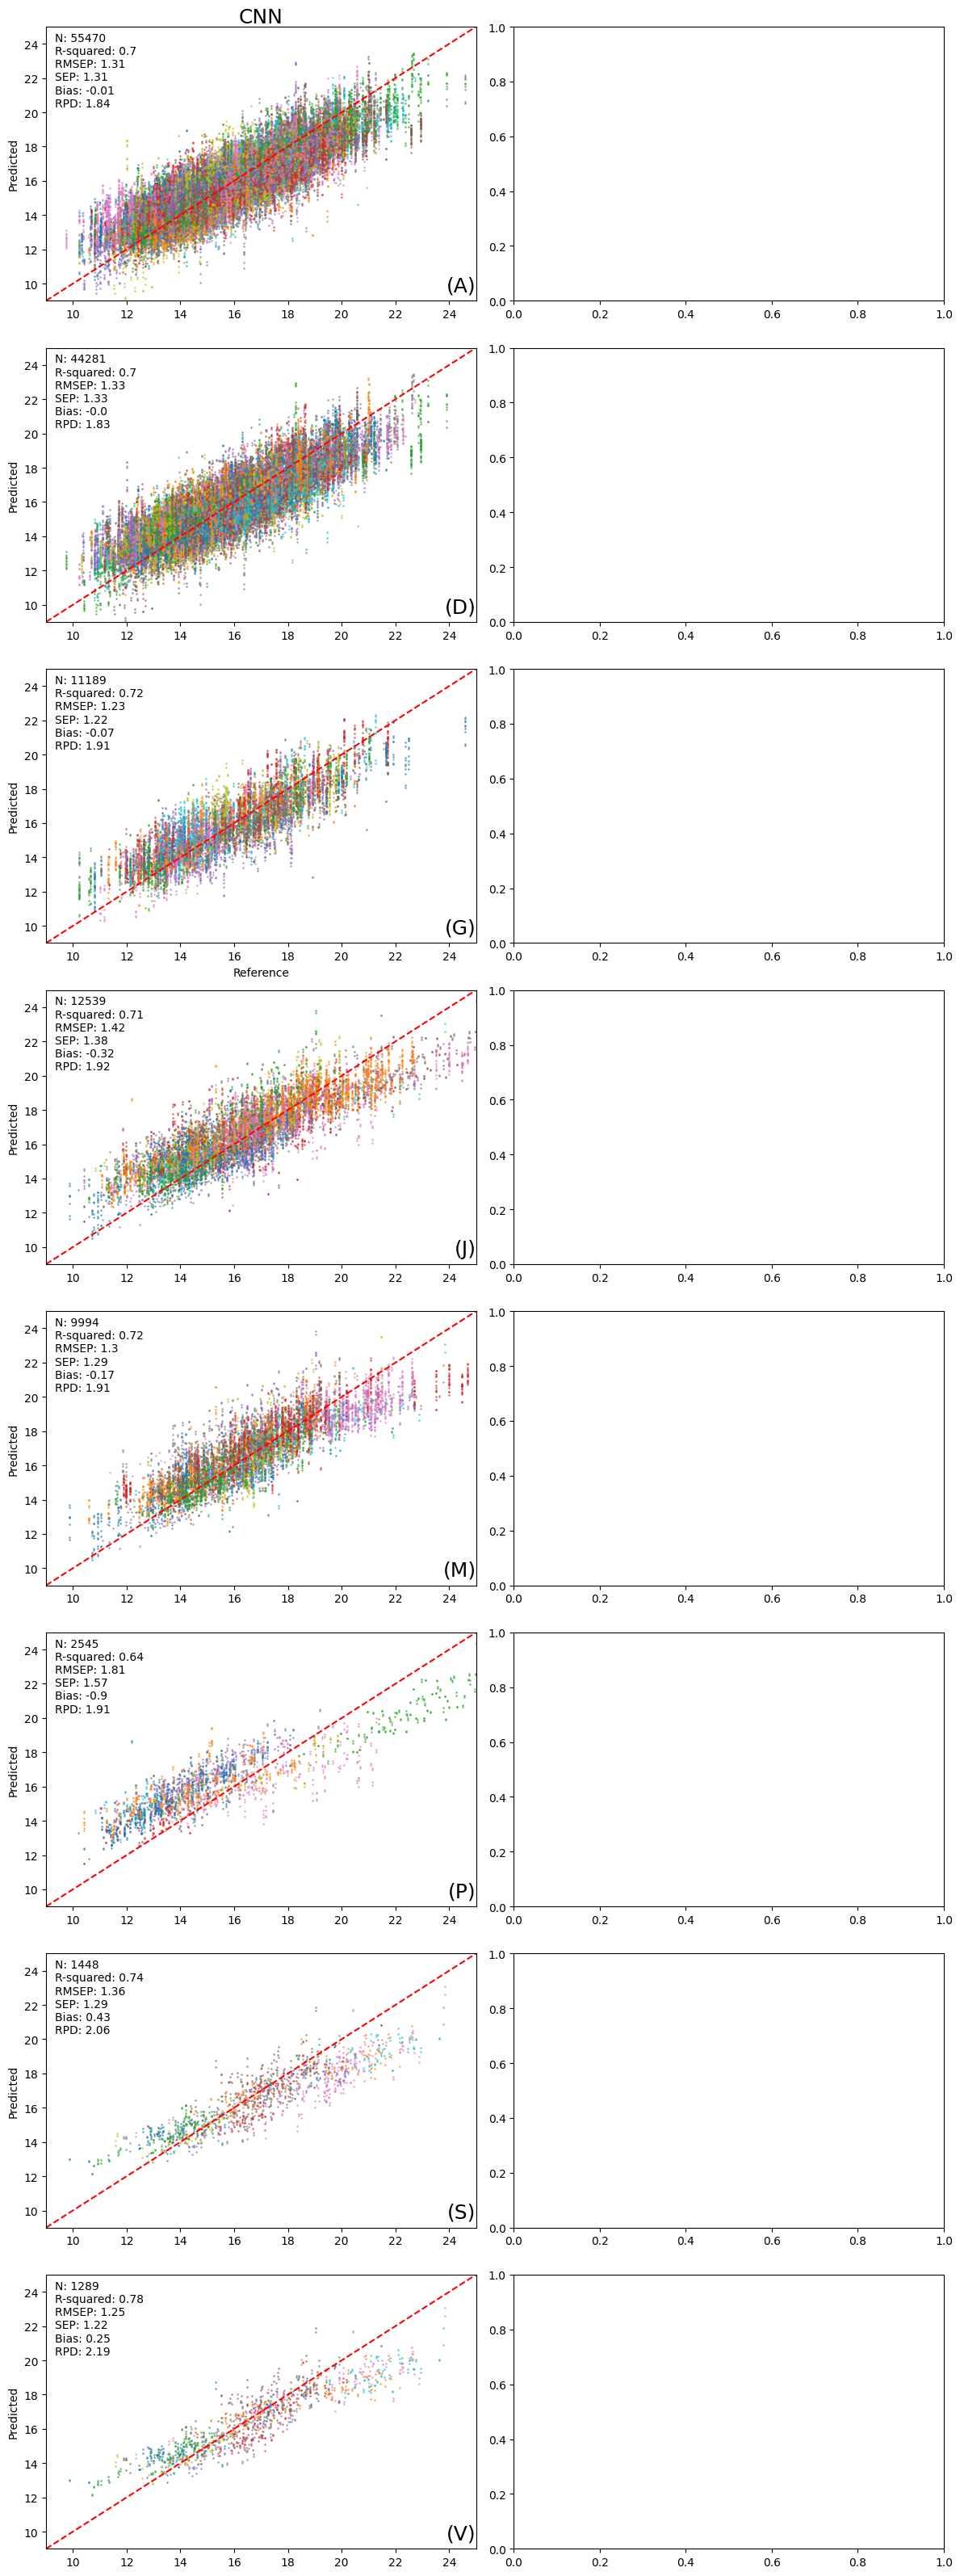

In [53]:
remove_subsequently_flagged = False

# create a figure with subplots - 4 rows (one for each query) and 3 columns (one for each model)
# plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('default')
fig, axes = plt.subplots(len(test_sets), 2, figsize=(12, 4*len(test_sets)))

# global min and max for axis scaling
global_min, global_max = 9, 25
test_sets


for i, (key, query) in enumerate(test_sets.items()):
    models = {
        "CNN": predictions.query(query),
    }
    if remove_subsequently_flagged:
        models = {
            "CNN": predictions.query(query),
        }
    
    # calculate metrics for each model
    metrics = {}
    for model_name, data in models.items():
        metrics[model_name] = study_utils.utils.calculate_metrics(
            y_true=models[model_name]["y_true"], 
            y_pred=models[model_name]["y_pred"]
        )
    stats = {}
    for model_name, metric in metrics.items():
        stats[model_name] = f"N: {metric['n']}\nR-squared: {round(metric['r2'], 2)}\nRMSEP: {round(metric['rmse'], 2)}\nSEP: {round(metric['sep'], 2)}\nBias: {round(metric['bias'], 2)}\nRPD: {round(metric['rpd'], 2)}"
    
    # plotting
    for j, (model_name, data) in enumerate(models.items()):
        ax = axes[i, j] if len(test_sets) > 1 else axes[j]  # Handle indexing for axes
        
        # generate color mapping for populations
        unique_populations = data["population"].unique()
        for population in unique_populations:
            data_p = data[data["population"] == population]
            ax.scatter(data_p["y_true"], data_p["y_pred"], s=1, alpha=0.5)
        ax.plot([global_min, global_max], [global_min, global_max], linestyle='--', color='red')
        
        if j in [0]: 
            ax.set_ylabel("Predicted")
            
        if i in [0]: 
            ax.set_title(model_name, fontsize=18, pad=-2)
            
        if i == len(models.items()) + 1: 
            # Only set xlabel for the bottom subplot
            ax.set_xlabel("Reference")
        
        ax.text(0.02, 0.98, stats[model_name], transform=ax.transAxes, fontsize=10, ha='left', va='top')
        title_label = chr(65 + i*3 + j)
        ax.text(1.0, 0.02, f"({title_label})", transform=ax.transAxes, fontsize=18, ha='right', va='bottom') 
        
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)
        


plt.tight_layout()
plt.show()
